<a href="https://colab.research.google.com/github/YinterestingProjects/human-wildlife-interactions/blob/main/reports/BERTopics_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizating Results from Topic Modeling via BERTopics 

### Step 1: install dependencies

In [20]:
! pip install pandas==1.4.2 joblib==1.2.0 bertopic==0.14.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pickle
import pandas as pd
from bertopic import BERTopic
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

RANDOM_SEED = 42

# helper functions
def create_wordcloud(model, topic):
    'this function creates wordclouds for keyterms within selected BERTopic cluster' # code reference from https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html

    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def search_topics(query, top_N_wrds):
  'this function returns the most relevant clusters based on query term, and the top N keywords within those clusters'

  similar_topics, similarity = topic_model.find_topics(query, top_n=top_N_wrds)

  for i, topic_n in enumerate(similar_topics):
    print(f'\ntopic {topic_n}, similiarity level: {similarity[i]:.3f}')
    print([(wrd, round(score,2)) for wrd, score in topic_model.get_topic(topic_n)])


### Step 2: load pre-trained model and data

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# enter the directory of the cloned repo
directory = '/content/drive/MyDrive/MADS/MADS_Capstone'

In [24]:
# get corpus
fp = f'{directory}/data/processed/topic_modeling_corpus.pkl'
docs = pd.read_pickle(fp)

# get timestamps
fp = f'{directory}/data/processed/topic_modeling_timestamps.pkl'
timestamps = pd.read_pickle(fp)

# get model
# pre-trained bertopic_guided model is available at https://drive.google.com/file/d/1-2j8lVnBHrxBxXnqjcy_LPGFeRmar0X-/view?usp=share_link 
# please download the model into the models folder of clone repo

model_fp = f'{directory}/models/bertopic_guided'
topic_model = BERTopic.load(model_fp)
topics, probs = topic_model.fit_transform(docs)

### Step 3: run visualizations

3.1 explore topics in 2D space

In [25]:
# customize topic labels
topic_labels = topic_model.generate_topic_labels(nr_words=3, topic_prefix=True, separator='_')
topic_model.set_topic_labels(topic_labels)

topic_model.visualize_topics(custom_labels=True)

3.2 visualize topic landscape and word score

In [26]:
# customize topic labels
topic_labels = topic_model.generate_topic_labels(nr_words=3, topic_prefix=True, separator='_')
topic_model.set_topic_labels(topic_labels)

topic_model.visualize_barchart(top_n_topics=75, n_words=10, width=450)

3.3 visualize similarity among topics

In [27]:
# customize topic labels
topic_labels = topic_model.generate_topic_labels(nr_words=1, topic_prefix=True, separator='_')
topic_model.set_topic_labels(topic_labels)

topic_model.visualize_heatmap(custom_labels=True)

3.4 visualize hierchical clustering results

In [28]:
# customize topic labels
topic_labels = topic_model.generate_topic_labels(nr_words=1, topic_prefix=True, separator='_')
topic_model.set_topic_labels(topic_labels)

hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, custom_labels=True)

100%|██████████| 55/55 [00:00<00:00, 136.74it/s]


3.6 visualize keyword wordcloud for specific topic of interest

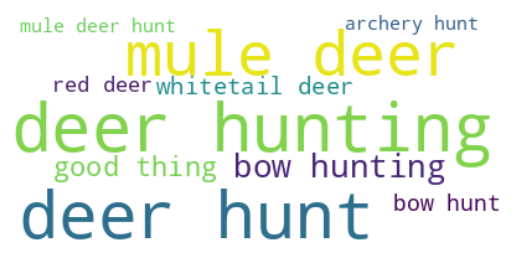

In [29]:
# chose a topic
topic_of_interest = 0

create_wordcloud(topic_model, topic=topic_of_interest)

3.7 visualize dynamic topic modeling results through time

In [41]:
# custom labels
topic_labels = topic_model.generate_topic_labels(nr_words=1, topic_prefix=True, separator='_')
topic_model.set_topic_labels(topic_labels)

# visualize by top number of topics 
top_n = 10

topics_over_time = topic_model.topics_over_time(docs, timestamps, nr_bins=20)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=top_n, custom_labels=True)

In [35]:
# visualize select specific groups 
interested_topics = [3, 18, 32]
topic_model.visualize_topics_over_time(topics_over_time, topics=interested_topics, custom_labels=True)

3.8 find relevant topics based query

In [40]:
search_topics('hunt', top_N_wrds=5)


topic 0, similiarity level: 0.780
[('deer hunting', 0.01), ('deer hunt', 0.01), ('mule deer', 0.01), ('bow hunting', 0.01), ('good thing', 0.01), ('whitetail deer', 0.01), ('bow hunt', 0.01), ('red deer', 0.01), ('mule deer hunt', 0.01), ('archery hunt', 0.01)]

topic 38, similiarity level: 0.634
[('bald eagle', 0.09), ('bonellis eagle hunting', 0.05), ('eagle hunting pigeons', 0.05), ('bonellis eagle', 0.05), ('hunting pigeons', 0.05), ('eagle hunting', 0.05), ('nesting wild eagle', 0.03), ('nest january 2011wmv', 0.03), ('old black vulture', 0.03), ('nest estonia verreaux', 0.03)]

topic 18, similiarity level: 0.592
[('moose hunt', 0.07), ('baby moose', 0.07), ('northern nh', 0.05), ('bull moose', 0.05), ('moose hunting', 0.05), ('hunt baby', 0.03), ('moose encounter', 0.03), ('yukon moose', 0.03), ('twin baby moose', 0.03), ('nh guide', 0.03)]

topic 17, similiarity level: 0.584
[('bull elk', 0.06), ('elk hunt', 0.06), ('elk hunting', 0.05), ('elk country', 0.05), ('elk elk', 0.05)

____________________
